###Importar librerías



In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
#si ya tiene habilitado la carpeta de gdrive no ejecute este código
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.DataFrame()
data = pd.read_csv(
    "/content/gdrive/My Drive/IA/mercadeo_bancario.csv", 
    encoding='utf-8')

###Conocer la data


In [ ]:
data.describe()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.0,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,5.702001,1.827231,4.410969,3.984680,0.421336,0.571914,0.199767,149706.676751,0.336409,2.497524,1.365252,0.0,3.979581,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,3.533820,0.608902,2.225748,2.583405,0.811128,0.541209,0.456002,166028.840792,4.478984,1.703683,0.481507,0.0,1.411514,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,3.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,7.000000,2.000000,4.000000,4.000000,0.000000,1.000000,0.000000,81778.500000,0.000000,2.000000,1.000000,0.0,4.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,9.000000,2.000000,7.000000,6.000000,0.000000,1.000000,0.000000,290938.500000,0.000000,4.000000,2.000000,0.0,5.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,11.000000,3.000000,7.000000,8.000000,2.000000,2.000000,2.000000,499992.000000,90.000000,5.000000,2.000000,0.0,6.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


In [ ]:
data.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

In [ ]:
data.head(5)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

In [ ]:
uniqueValues = data['credito_sin_pago'].unique()
print(sorted(uniqueValues))

['no', 'unknown', 'yes']


### Convertir Data Categorica en Data Numerica

In [ ]:
trabajo = {
    'unknown': 0,
    'admin.': 1, 
    'housemaid': 2, 
    'management': 3, 
    'retired': 4, 
    'self-employed': 5, 
    'student': 6, 
    'technician': 7, 
    'unemployed': 8,
    'blue-collar': 9,
    'services': 10,
    'entrepreneur': 11
    }
data['trabajo'] = data['trabajo'].map(trabajo)

In [ ]:
estado_civil = {
    'unknown': 0,
    'single': 1,
    'married': 2,
    'divorced' : 3
    }
data['estado_civil '] = data['estado_civil '].map(estado_civil)

In [ ]:
educacion = {
    'unknown': 0,
    'preschool': 1,
    'primary_school': 2,
    'tecnical_school': 3,
    'Technological_school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}
data['educacion'] = data['educacion'].map(educacion)

In [ ]:
credito_sin_pago = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['credito_sin_pago'] = data['credito_sin_pago'].map(credito_sin_pago)

In [ ]:
prestamo_vivienda = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['prestamo_vivienda'] = data['prestamo_vivienda'].map(prestamo_vivienda)

In [ ]:
prestamo_personal = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['prestamo_personal'] = data['prestamo_personal'].map(prestamo_personal)

In [ ]:
contacto = {
    'cellular': 1,
    'telephone': 2,
}
data['contacto'] = data['contacto'].map(contacto)

In [ ]:
mes = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11
}
data['mes'] = data['mes'].map(mes)

In [ ]:
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
data['dia_semana'] = data['dia_semana'].map(dia_semana)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      41188 non-null  int64  
 1   trabajo                   41188 non-null  int64  
 2   estado_civil              41188 non-null  int64  
 3   educacion                 41188 non-null  int64  
 4   total_hijos               41188 non-null  int64  
 5   credito_sin_pago          41188 non-null  int64  
 6   prestamo_vivienda         41188 non-null  int64  
 7   prestamo_personal         41188 non-null  int64  
 8   valor_prestamo            41188 non-null  int64  
 9   dias_ultimo_pago          41188 non-null  int64  
 10  tarjetas_credito          41188 non-null  int64  
 11  contacto                  41188 non-null  int64  
 12  mes                       0 non-null      float64
 13  dia_semana                41188 non-null  int64  
 14  duraci

In [ ]:
data = data.fillna(0)

In [ ]:
data['mes'] = data['mes'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

### Graficar la Data

In [ ]:
data.describe()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.0,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,5.702001,1.827231,4.410969,3.984680,0.421336,0.571914,0.199767,149706.676751,0.336409,2.497524,1.365252,0.0,3.979581,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,3.533820,0.608902,2.225748,2.583405,0.811128,0.541209,0.456002,166028.840792,4.478984,1.703683,0.481507,0.0,1.411514,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,3.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,7.000000,2.000000,4.000000,4.000000,0.000000,1.000000,0.000000,81778.500000,0.000000,2.000000,1.000000,0.0,4.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,9.000000,2.000000,7.000000,6.000000,0.000000,1.000000,0.000000,290938.500000,0.000000,4.000000,2.000000,0.0,5.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,11.000000,3.000000,7.000000,8.000000,2.000000,2.000000,2.000000,499992.000000,90.000000,5.000000,2.000000,0.0,6.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


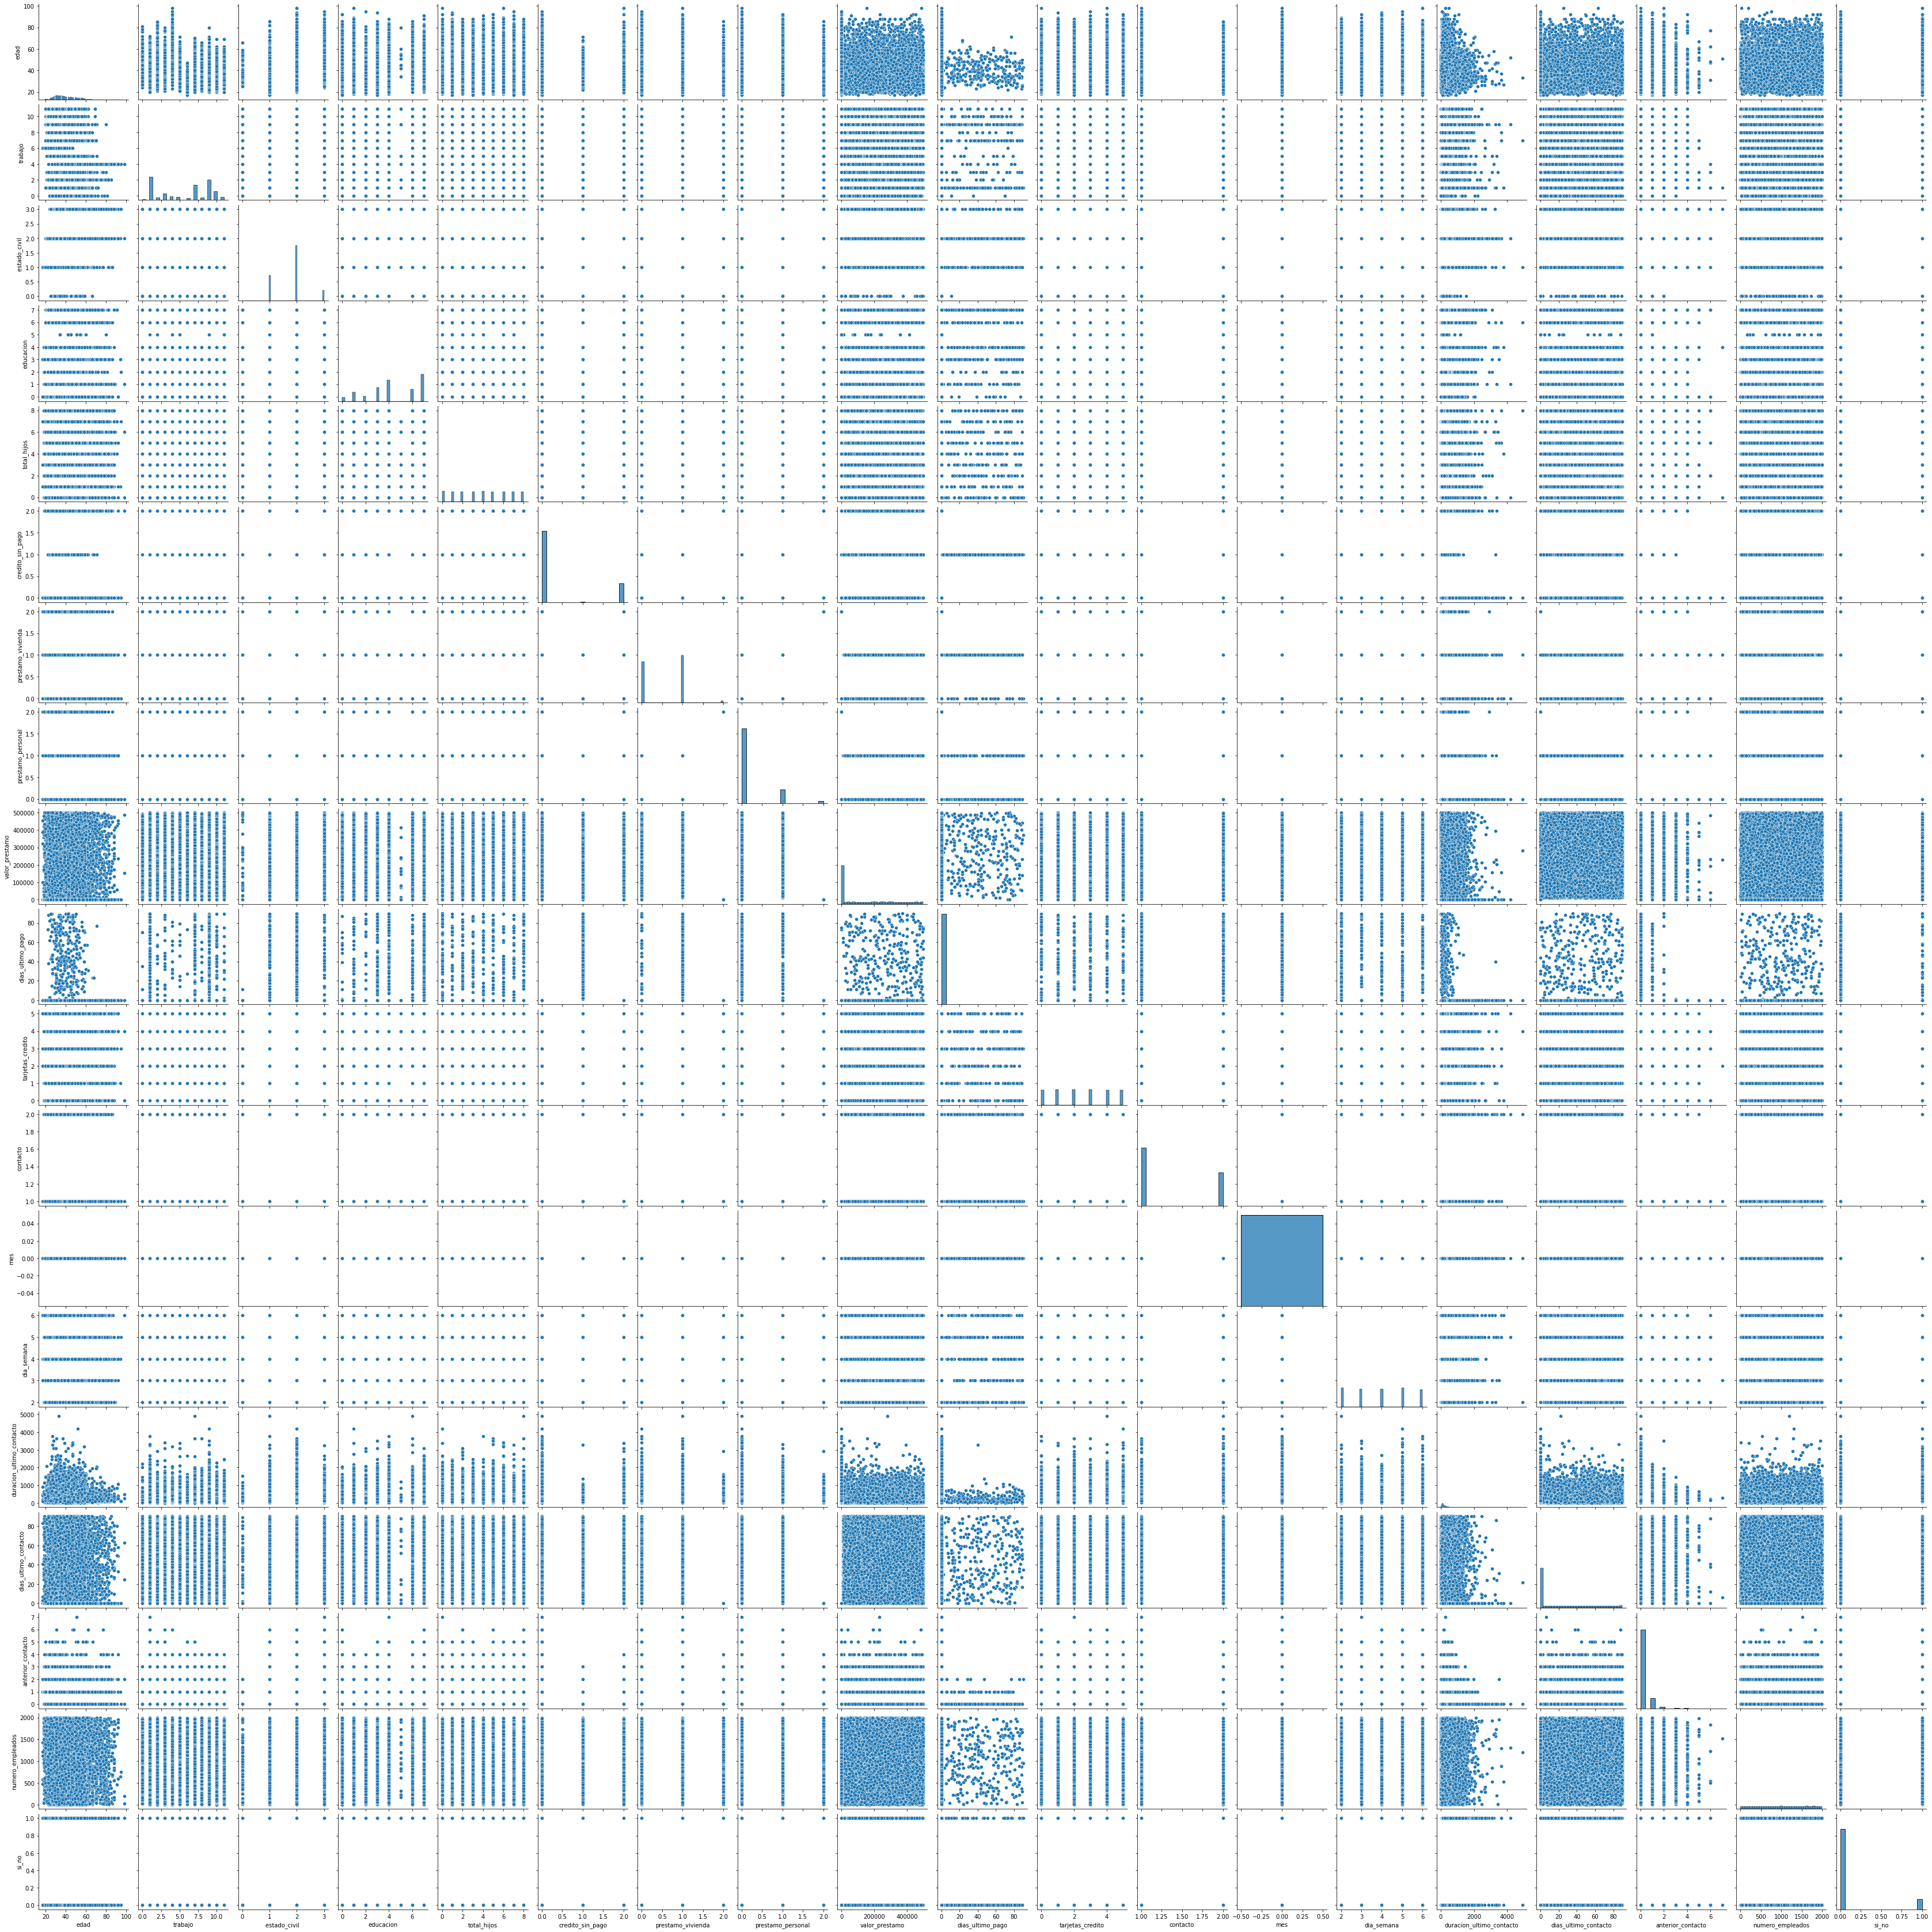

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

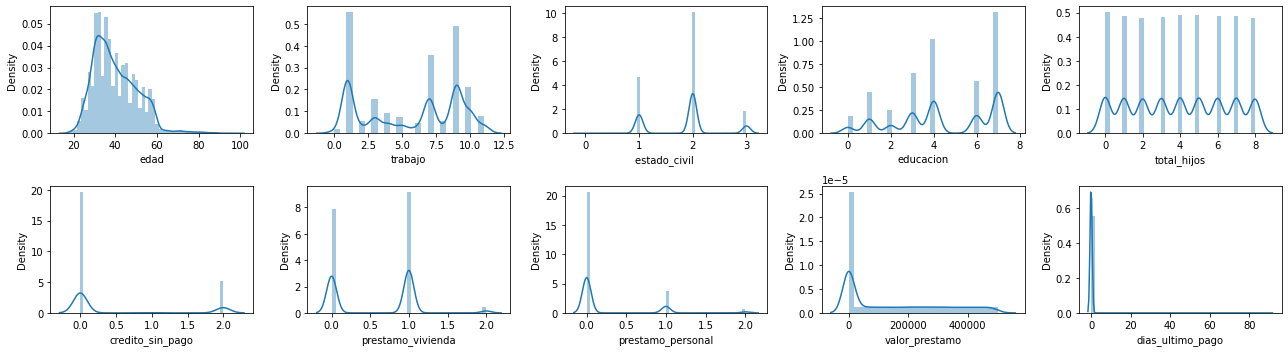

In [ ]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18,5))

col = data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]], ax=ax[i][j])
    index += 1

plt.tight_layout()

### Responder algunas preguntas

Edad promedio de los que dijeron si

In [ ]:
data[data['si_no']==1]['edad'].mean()

40.91314655172414

Edad promedio de los que dijeron no

In [ ]:
data[data['si_no']==0]['edad'].mean()

39.911185290576775

Promedio de hijos

In [ ]:
data['total_hijos'].mean()

3.9846800038846264

Cantidad de personas según su estado Civil

In [ ]:
data['estado_civil '].value_counts()

2    24928
1    11568
3     4612
0       80
Name: estado_civil , dtype: int64

Cantida de personas según su educación

In [ ]:
data['educacion'].value_counts()

7    12168
4     9515
3     6045
6     5243
1     4176
2     2292
0     1731
5       18
Name: educacion, dtype: int64

### Construir el modelo de Regresión Logística

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data.drop('si_no', axis=1)
y = data.si_no

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [ ]:
x_train.shape

(32950, 18)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 88.77154649186696%


In [ ]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[0 0 1 ... 0 0 0]


In [ ]:
logistic_regression.score(x_test, y_test)

0.8877154649186696

### Predicciones Manuales

Predecir la respuesta de las siguientes personas con las caracteristicas:

||Edad|Trabajo|Estado Civil|Educacion|Total hijos|Credito_sin_pago|Prestamo vivienda|Prestamo personal|Valor prestamo|Dias ultimo pago|Tarjetas credito|Contacto|Mes|Día semana|Duración último contacto|Días último contacto|Anterior contacto|numero_empleados|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|persona-1|20|unemployed|single|tecnical school|0|yes|no|yes|2000|3|0|1|april|monday|280 sg|15|2|0|

In [ ]:
personas = np.array([[41,8,1,3,0,0,0,1,100,3,0,1,4,2,280,15,2,100]])
x_new = pd.DataFrame(personas, columns=['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'])
y_prediction = logistic_regression.predict(x_new)
print(y_prediction)

[0]


### Recursive Feature Elimination (RFE) - Eliminación de características recursivas (RFE)

---
https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451


Es un algoritmo ampliamente utilizado para seleccionar características que son más relevantes para predecir la variable objetivo en un modelo predictivo, ya sea regresión o clasificación. RFE aplica un proceso de selección hacia atrás para encontrar la combinación óptima de características. Primero, crea un modelo basado en todas las características y calcula la importancia de cada característica en el modelo. Luego, clasifica las características y elimina las que tienen la menor importancia de manera iterativa según las métricas de evaluación del modelo

* Newton-cg — Un método newton. Los métodos de Newton utilizan una matriz hessiana exacta. Es lento para grandes conjuntos de datos, porque calcula las segundas derivadas.
* lbfgs - Significa Memoria limitada Broyden-Fletcher-Goldfarb-Shanno. Se aproxima a las actualizaciones de la segunda matriz derivada con evaluaciones de gradiente. Almacena solo las últimas actualizaciones, por lo que ahorra memoria. No es súper rápido con grandes conjuntos de datos.
* liblinear - Utiliza un algoritmo de descenso de coordenadas. En otras palabras, se mueve hacia el mínimo en una dirección a la vez. Es rápido con conjuntos de datos pequeños
* Sag - Utiliza una muestra aleatoria de valores de gradiente anteriores.



In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(solver='lbfgs', max_iter=100000)
rfe = RFE(model, 3, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


In [91]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('X.Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

X.Column: 0, Selected False, Rank: 5.000
X.Column: 1, Selected False, Rank: 6.000
X.Column: 2, Selected True, Rank: 1.000
X.Column: 3, Selected True, Rank: 1.000
X.Column: 4, Selected False, Rank: 2.000
X.Column: 5, Selected False, Rank: 7.000
X.Column: 6, Selected True, Rank: 1.000
X.Column: 7, Selected False, Rank: 4.000
X.Column: 8, Selected True, Rank: 1.000
X.Column: 9, Selected False, Rank: 3.000


In [85]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print(X.Columns[i], 'Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

AttributeError: ignored

In [ ]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False])

In [ ]:
X.head(1)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados
0,44,9,2,1,7,2,1,0,268017,0,5,1,0,5,210,43,0,88


In [ ]:
XX = X[X.columns[rfe.support_]]
XX.head(1)

,credito_sin_pago,contacto,anterior_contacto
0,2,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=8, stratify=y)

In [ ]:
X_train.shape

(32950, 3)

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.8883224083515416